<a href="https://colab.research.google.com/github/AbhayMudgal/BTP/blob/main/BTP_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import random


%matplotlib inline 
#plt.rcParams["figure.figsize"] = (10,10)


In [ ]:
def B(delE):
  # The metropolis funtion. The multiplier 200 is taken by using the constants
  # in ΔE/kT. It will vary is specific systems are used or other values are taken. 
  
  dE = -delE * 200
  if dE > 1:
    dE = 1
  U = math.exp(dE)
  if dE < -5:
    U = 0
  return min(U, 1)

def E( X, Y, W, H):
  # The Energy funtion for the interaction between solute and dislocation. We do
  # not use the values of other variables as they are collectively assumed to a 
  # value in the metropolis function. 
  
  pi = np.pi
  ans = 0
  for i in range(-4, 5):
    ans += ( np.sin(2*pi*Y) / ( np.cosh(2*pi*(X - (i*W/H))) - np.cos(2* pi *Y)))
  
  return ans

def En(sig, mul):
  # Energy function for the dislocation. 
  E_prime = sig*mul
  return E_prime

def Bn(delE):
  # Meteropolis function for the dislocation
  deE = -delE
  if deE > 1:
    deE = 1
  U = math.exp(deE)
  if deE < -5:
    U = 0
  return min(U, 1)

def E_tot(sol_loc, x_dis, y_dis, H, W):
  # function for calculating the total energy field of the dislocation-solute
  # interaction
  
  E_dis = 0
  for [x, y] in sol_loc:
    X = (x - x_dis) / W
    Y = (y - y_dis) / H
    E_dis = E_dis + E(X, Y, W, H)

  return E_dis*200

def randomize(array, loc_set, sol_loc, H, W):
  # function for randimizing the solute atoms when dislocation completes one pass
  # through the simulation cell. 
  
  val = 2*W /5 # val can be set to define the number of dislocation atoms whose 
  # position has to be randomised. 

  for [x, y] in sol_loc:
    flag = True
    while flag:
      x_new = random.randint(0, W-1)
      y_new = random.randint(0, H-1)
      if x < val:
        flag = False
        break

      if [x_new, y_new] not in sol_loc:
        loc_set.remove((x, y))
        loc_set.add((x_new, y_new))
        sol_loc.remove([x, y])
        sol_loc.append([x_new, y_new])
        array[x][y] = 0
        array[x_new][y_new] = 1
        flag = False


In [ ]:
# Code for testing dislocation motion algorithm as described in the paper.
# Runnning ths code gives us the results of the case where no solute atoms are 
# present. 

W = int (input("Enter Width of the simulation cell: "))
H = int (input("Enter Height of the simulation cell: "))
iter = int (input("Enter number of iterations: "))
mul = float (input("Enter Multiplier for external stress in Meteropolis Function: "))

mix = [] # a list to which we will append the displacement vectors for calculating
# average velocity for different external stresses.

sig = 0.001 # initial external stress.

x = [] # a list to which values of external stresses are appended.

while sig<=0.04:
  array = np.zeros((W, H), int)
  x_dis = int (W/2)
  y_dis = int (H/2)

  array[x_dis][y_dis] = -1


  vel = [] # displacement vector.
  k = 0 # total distance moved.
  i = 0
  for i in range(iter):
    U = random.randint(0, 1)
    
    if U == 0: #represents negative jump.
      dE = En(sig, mul)
      x_dis_new = (x_dis - 1) % W
    
    else: # represents postive jump.
      dE = -En(sig, mul)  
      x_dis_new = (x_dis + 1) % W

    bd = Bn(dE)
    n = random.random()
    
    if n<bd:
      array[x_dis][y_dis] = 0
      x_dis = x_dis_new
      array[x_dis][y_dis] = -1
      k = k + (2*U - 1)
    
    if i%10000 == 0: # calculate the value for every 10000 steps. 
      vel.append(k)
  
  x.append(sig)
  sig += 0.001
  mix.append(vel)    

y = [] 
# code below calculates the average velocity for each external stress in x and
# appends it in y.
for row in mix:
  sum = row[0]
  for i in range(len(row) - 1):
     sum += row[i+1] - row[i] 
  sum = sum / len(row)
  y.append(sum/10000)

#plotting the velocity vs stress graph.
plt.plot(x, y)
plt.xlabel("External Stress")
plt.ylabel("Velocity of Dislocation")

In [ ]:
#entering parameters.
conc = float (input("Enter percentage concentration of solute: "))
Mr = float (input("Enter mobility ratio: "))
mul = float (input("Enter Multiplier for external stress in Meteropolis Function: ")) #(100 or 50)

In [ ]:
sig = float (input("Enter external stress as a function of G: "))

In [ ]:
W = int (input("Enter Width of the simulation cell: "))
H = int (input("Enter Height of the simulation cell: "))

In [ ]:
#initializing array  and randomly distributing solutes in the matrix

array = np.zeros((W, H), int)

sol_loc = [] # represents an array with the locations of the solute atoms.
loc_set = set() # a set containing the locations of the solute atoms and the dislocation. 
sol = (H*W*conc)/100
a = 0
R = sol*Mr # Mobility parameter.

x_dis = int (W/2)
y_dis = int (H/2)

array[x_dis][y_dis] = -1
loc_set.add((x_dis, y_dis))

while (a < sol):
  i = random.randint(0, W-1)
  j = random.randint(0, H-1)

  if array[i][j] == 0:
    array[i][j] = 1
    a += 1
    loc_set.add((i, j))
    sol_loc.append([i, j])   
      
  if (a==sol): 
    break 


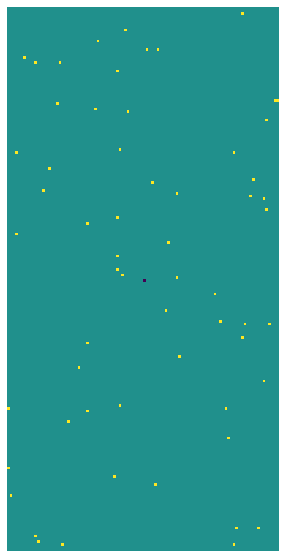

In [ ]:
#projecting the array as image
plt.rcParams["figure.figsize"] = (5,10) # represents the dimensions of the image.
# can be varied to suit the dimensions of the simulation cell. 

plt.grid(False)
plt.axis('off')
image = plt.imshow(array, interpolation='nearest')
plt.show()

Enter Number of Iterations: 50000


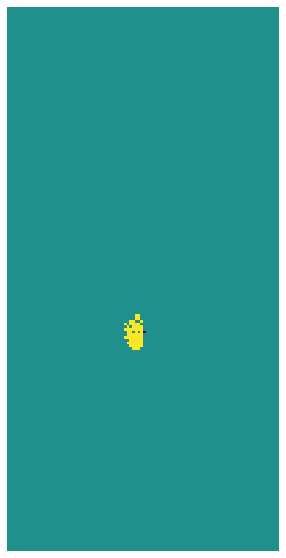

In [ ]:
# The main simulation algorithm. It calculates the parameters and then chooses whether 
# we move the dislocation or the a solute atom. 

iter = int (input("Enter Number of Iterations: "))
vel = [] # velocity vector
disp = 0 # total displacement variable.

for i in range (0, iter):
   
   # The if statement is the code for downloading the of the simulation cell. 
   # Create a folder image on the device and copy the path and replace it with 
   # "Image" in the below code. This is the most time consuming step. As such for
   # only observation we can reduce the frequency of image collection.  
   
   # array2 = array[x_dis - k:x_dis + k][y_dis - k:y_dis + k]
   # array2 a subset of main simulation cell can be used in showing the portion of 
   # 2k x 2k around the dislocation by replacing array by array2 in the image line. 
  
  if i%100 == 0:
      name = r"Image/" + str (int( i/100)) + ".png"
      plt.rcParams["figure.figsize"] = (5,10)
      plt.grid(False)
      plt.axis('off')
      image = plt.imshow(array, interpolation='nearest')
      plt.savefig(name)

  
  if i%1000 == 0:
    vel.append(disp)

  n = random.randint(0, int (R))
  
  if n == 0:
    # dislocation motion condition.
    
    k = random.randint(0, 1)
    if k == 0:
      dE = En(sig, mul)
      x_dis_new = (x_dis - 1) % W
    
    else:
      dE = -En(sig, mul)  
      x_dis_new = (x_dis + 1) % W

    # The following two lines of code consider the influence of solute atoms on the
    # dislocation. Although very less compared to the influence of external stress,
    # using this should improve the accuracy of the simulation. However it doubles
    # the time required to run the simulation. 

    # delE = E_tot(sol_loc, x_dis_new, y_dis, H, W) - E_tot(sol_loc, x_dis, y_dis, H, W)
    # dE = dE + delE
    
    bd = Bn(dE)
    n = random.random()
    
    if n < bd:
      if (x_dis_new, y_dis) not in loc_set:
        loc_set.remove((x_dis, y_dis))
        loc_set.add((x_dis_new, y_dis))
        array[x_dis][y_dis] = 0
        array[x_dis_new][y_dis] = -1
      else:  
        sol_loc.remove([x_dis_new, y_dis])
        sol_loc.append([x_dis, y_dis])
        array[x_dis][y_dis] = 1
        array[x_dis_new][y_dis] = -1

      x_dis = x_dis_new
      disp = disp + (2*k - 1)
    
    if x_dis==0:
      randomize(array, loc_set, sol_loc, H, W) 

  else:
    # solute motion case
    n = random.randint(0, sol-1) # selecting a random solute.
    x = sol_loc[n][0]
    y = sol_loc[n][1]
    
    k = random.randint(0, 3)
    for i in range(4):
      k = (k + i) % 4
      xi = x
      yi = y

      # probable jumps
      if (k==0):
        xi = (x - 1) % W
      elif (k==1):
        yi = (y - 1) % H
      elif (k==2):
        xi = (x + 1) % W
      else:
        yi = (y + 1) % H
      
      if ((xi, yi) not in loc_set): # checking if jump is feasible.
        
        X = (x - x_dis) / W
        Y = (y - y_dis) / H
        Xi = (xi - x_dis) / W
        Yi = (yi - y_dis) / H
        

        delE = E(Xi, Yi, W, H) - E(X, Y, W, H)
        n = random.random()
        b = B(delE)

        if n < b:
          m = random.random()
          if delE*200 < 0 or m>0.8:
            
            # updating simulation cell, set and list.
            array[x][y] = 0
            array[xi][yi] = 1

            loc_set.remove((x, y))
            loc_set.add((xi, yi))
            sol_loc.append([xi, yi])
            sol_loc.remove([x, y])
            
            break



In [ ]:
# if used in colab this code can be used to create a downloadable zip file. 
!zip -r /content/Image.zip /content/Image

In [ ]:
# plotting graph of displacement vs Montecarlo steps.
X = []
for i in range(1000):
  X.append(i/100)

Y = []
Y.append(vel[0])
for i in range(len(vel) - 1):
  Y.append(vel[i+1] - vel[i]) 

plt.rcParams["figure.figsize"] = (5,5)
plt.scatter(X, vel)

plt.ylabel("Displacement of the Dislocation")
plt.xlabel("Number of Montecarlo Steps (per 100000)")

1000


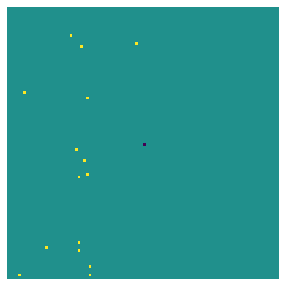

In [ ]:
#plotting graph of the magnified simulation cell after the process is complete.
array2 = array[x_dis-50:x_dis+50][y_dis-50:y_dis+50]
plt.grid(False)
plt.axis('off')
plt.rcParams['figure.figsize'] = (5, 5)
image = plt.imshow(array2, interpolation='nearest')
plt.show()

In [ ]:
#calculating the average velocity of the dislocation. 
sum = vel[0]
for i in range(len(vel) - 1):
  sum += vel[i+1] - vel[i] 
sum = sum / len(vel)

print(sum/1000)

0.055531


In [ ]:
#plotting image
plt.grid(False)
plt.axis('off')
image = plt.imshow(array, interpolation='nearest')
plt.show()